In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [ ]:
#The goal of this analysis is to identify the patients that had a hemoglobin A1c above 8 and make a comparison between those that are taking diabetes medication and those that are not. In that comparison, I want to know which cohort spends more time in the hospital.  Before I make that comparison, I will need to make sure that the data is clean and to remove null values that would negatively impact my analysis.

In [3]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
#In reviewing the data, I see that the weight column has non-numerical data that will need to be removed.  

In [6]:
df['weight'].isnull()

0         True
1         True
2         True
3         True
4         True
          ... 
101761    True
101762    True
101763    True
101764    True
101765    True
Name: weight, Length: 101766, dtype: bool

In [7]:
df['weight'].fillna('NaN', inplace=True)

In [8]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
#Now that I have removed the null values,I will need to create my two cohorts among patients that had an A1c greater than 8.  Cohort A (Df1) will include people that are taking diabetes medication and Cohort 2 (Df2) will include people that are not taking diabetes medication. Df3 will include include both Cohort A and Cohort B.

In [ ]:
#Cohort A - Taking Diabetes Medication = Df1

In [20]:
Df1 = df[(df['A1Cresult'] == '>8') & (df['diabetesMed'] == 'Yes')]

In [ ]:
#Cohort B - Not Taking Diabetes Medication = Df2

In [21]:
Df2 = df[(df['A1Cresult'] == '>8') & (df['diabetesMed'] == 'No')]

In [ ]:
#Cohort A and Cohort B combined = Df3

In [22]:
Df3 = df[(df['A1Cresult'] == '>8')]

In [ ]:
#To make this comparison between Cohort A and Cohort B, I will first utilize a categorical bar plot to see which group spent more time in the hospital. 

<Axes: xlabel='diabetesMed', ylabel='time_in_hospital'>

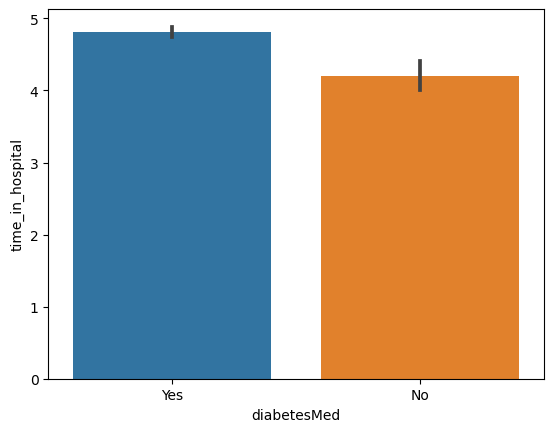

In [24]:
sns.barplot(x='diabetesMed', y='time_in_hospital', data=Df3)

In [ ]:
#The categorical bar plots show that Cohort A - Taking Diabetes Medication (DF1), spent more time in the hospital in comparison to Cohort B - Not Taking Diabetes Medication (Df2).

In [25]:
#To further make this comparison, I want to know the average number of days spent in the hospital for Cohort A - Taking Diaetes Medication and Cohort B - Not Taking Diabetes Medication.  I will calculate the mean of "time_in_hospital".

In [27]:
Df1['time_in_hospital'].mean()

4.808039929852961

In [28]:
Df2['time_in_hospital'].mean()

4.206724782067248

In [ ]:
#The average number of days that Corhort A (Taking Diabetes Medication) spends in the hospital is 5 days and Cohort B (Not Taking Diabetes Medication) is 4 days.

In [ ]:
#I will utilize a histogram to understand the frequency in "time_in_hospital" between Cohorts A (Taking Diabetes Medication) and Cohort B (Not Taking Diabetes Medication).

C:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Cohort A-Taking Diabetes Medication')

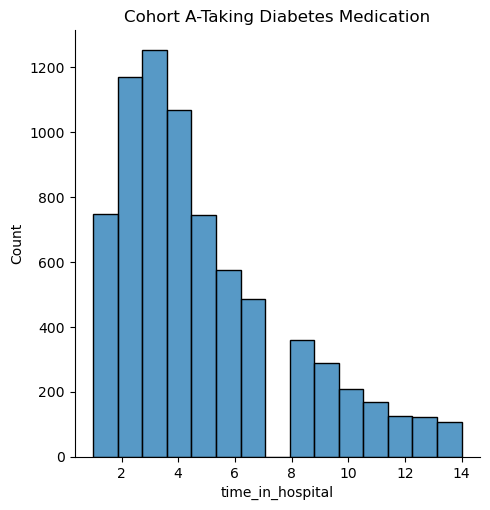

In [42]:
sns.displot(Df1['time_in_hospital'],bins=15)
plt.title("Cohort A-Taking Diabetes Medication")

C:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Cohort B-Not Taking Diabetes Medication')

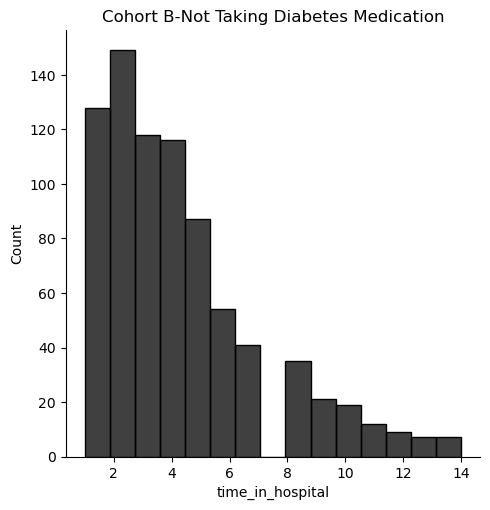

In [43]:
sns.displot(Df2['time_in_hospital'],bins=15, color='k')
plt.title("Cohort B-Not Taking Diabetes Medication")

In [ ]:
#The histograms for both cohorts have a positive skew, which means that most of the values are near the lower end of the range for time spent in hospital, which is between 1 - 14 days in the hospital.  

In [ ]:
#The highest peak in the histogram for Cohort A represents the mode, which is 3.  This means that the majority of people in Cohort A stayed 3 days in the hospital. The mode for Cohort B is 2, which means that most people stayed 2 days in the hospital. 

In [ ]:
#The analysis of patients with a hemoglobin A1c above 8 indicates that the patients in Cohort A that is taking diabetes medication spent more time in the hospital, with an average of 5 days in comparison to Cohort B that is not taking diabetes medication with an average of 4 days in the hospital.  Additionally, the majority of patients in Cohort A spent 3 days in the hospital, while the majority of patients in Cohort B spent 2 days in the hospital. In conclusion, the data demonstrates a positive correlation between patients taking diabetes medication and staying longer in the hospital. 